# Machine Learning for Business Decisions - Individual Assignment

## EDA & Pre-processing

### Loading The Data & Initial Inspection

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
df=pd.read_csv('/content/MYproperty_sales.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Type,Owner
0,79545.45857,5.682861,7.009188,4.09,23086.80050,"$1,059,033.56","549 Jalan Sultan, 50000 Shah Alam, Malacca, Ma...",landed,NaN
1,79248.64245,6.002900,6.730821,3.09,40173.07217,"$1,505,890.92","758 Jalan Indah, 75000 Ipoh, Penang, Malaysia",landed,NaN
2,61287.06718,5.865890,8.512727,5.13,36882.15940,"$1,058,987.99","563 Jalan Kasturi, 30000 Petaling Jaya, Kuala ...",landed,NaN
3,63345.24005,7.188236,5.586729,3.26,34310.24283,"$1,260,616.81","868 Jalan Ampang, 10300 Kuala Lumpur, Malacca,...",landed,NaN
4,59982.19723,5.040555,7.839388,4.23,26354.10947,"$630,943.49","867 Jalan Indah, 25000 Kuantan, Selangor, Mala...",landed,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5    Price                        4980 non-null   object 
 6   Address                       4996 non-null   object 
 7   Type                          5000 non-null   object 
 8   Owner                         0 non-null      float64
dtypes: float64(6), object(3)
memory usage: 351.7+ KB


In [ ]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Owner
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,0.0
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,NaN
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,NaN
min,17796.631190,2.644304,3.236194,2.000000,172.610686,NaN
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,NaN
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,NaN
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,NaN
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,NaN


In [ ]:
df.nunique()

,0
Avg. Area Income,5000
Avg. Area House Age,5000
Avg. Area Number of Rooms,5000
Avg. Area Number of Bedrooms,255
Area Population,5000
Price,4979
Address,4989
Type,1
Owner,0


### Cleaning & Handling Missing Values

In [ ]:
# Drop the "Owner" and "Type" columns
cleaned_df = df.drop(columns=['Owner', 'Type'])
cleaned_df.columns = cleaned_df.columns.str.strip()  # Removes any extra spaces

In [ ]:
# Convert the 'Price' column from a string format with "$" and "," into a numeric format
cleaned_df['Price'] = cleaned_df['Price'].str.replace('[\$,]', '', regex=True).astype(float)
cleaned_df['Price']

,Price
0,1059033.56
1,1505890.92
2,1058987.99
3,1260616.81
4,630943.49
...,...
4995,1060193.79
4996,1482617.73
4997,1030729.58
4998,1198656.87


In [ ]:
cleaned_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1059033.56,"549 Jalan Sultan, 50000 Shah Alam, Malacca, Ma..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1505890.92,"758 Jalan Indah, 75000 Ipoh, Penang, Malaysia"
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1058987.99,"563 Jalan Kasturi, 30000 Petaling Jaya, Kuala ..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1260616.81,"868 Jalan Ampang, 10300 Kuala Lumpur, Malacca,..."
4,59982.19723,5.040555,7.839388,4.23,26354.10947,630943.49,"867 Jalan Indah, 25000 Kuantan, Selangor, Mala..."


In [ ]:
cleaned_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4.980000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.231542e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.530439e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.973965e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232010e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.469933e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [ ]:
# Checking for missing values
print(cleaned_df.isnull().sum())

Avg. Area Income                 0
Avg. Area House Age              0
Avg. Area Number of Rooms        0
Avg. Area Number of Bedrooms     0
Area Population                  0
Price                           20
Address                          4
dtype: int64


In [ ]:
# Drop rows with missing values in the 'Address' column
cleaned_df = cleaned_df.dropna(subset=['Address'])

# Verify that the rows with missing values are removed
print(cleaned_df.isnull().sum())

Avg. Area Income                 0
Avg. Area House Age              0
Avg. Area Number of Rooms        0
Avg. Area Number of Bedrooms     0
Area Population                  0
Price                           20
Address                          0
dtype: int64


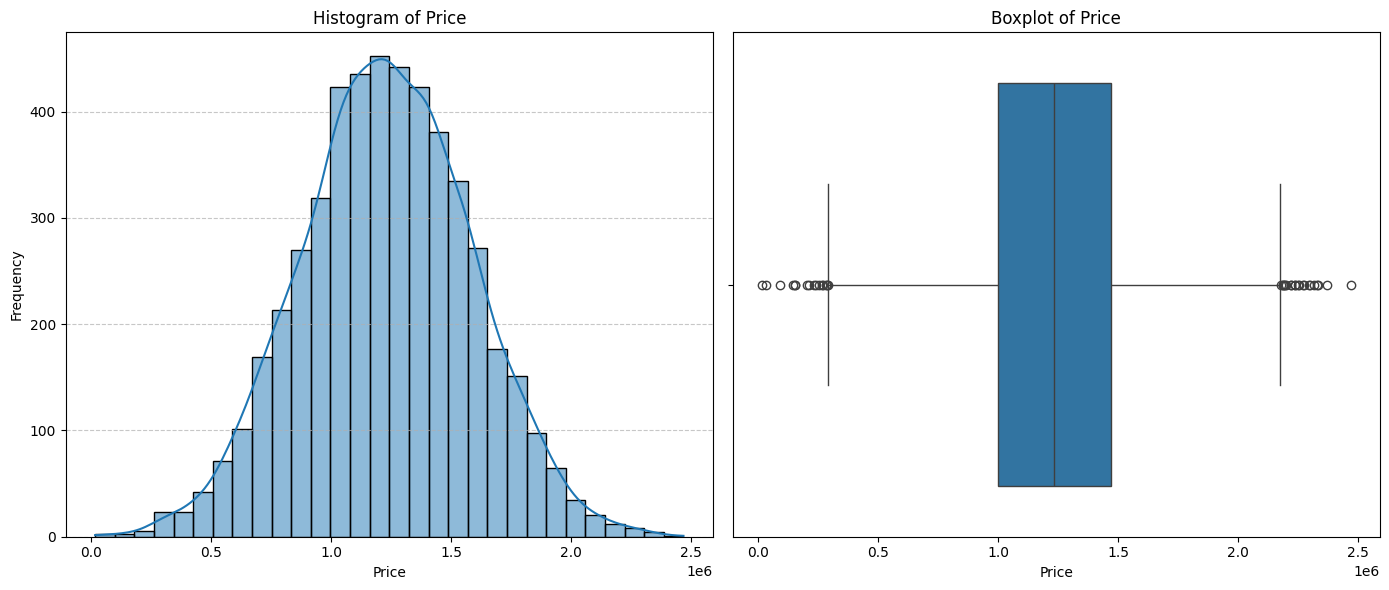

Skewness: -0.002167526860886874


In [ ]:
# Plotting the histrogram and boxplot for 'Price' to assess the skewness
# Set up the figure and axes for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for 'Price'
sns.histplot(data=cleaned_df, x='Price', kde=True, bins=30, ax=axes[0])
axes[0].set_title('Histogram of Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Boxplot for 'Price'
sns.boxplot(data=cleaned_df, x='Price', ax=axes[1])
axes[1].set_title('Boxplot of Price')
axes[1].set_xlabel('Price')

# Adjust layout
plt.tight_layout()
plt.show()

# Checking the skewness of 'Price'
print('Skewness:', cleaned_df['Price'].skew())

In [ ]:
# Distribution of 'Price' is relatively normal, hence the mean will be used to replace the missing values
# Calculate the mean of the 'Price' column
mean_price = cleaned_df['Price'].mean()

# Replace missing values in 'Price' with the mean by assigning back to the column
cleaned_df['Price'] = cleaned_df['Price'].fillna(mean_price)

print(cleaned_df.isnull().sum())

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4996 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4996 non-null   float64
 1   Avg. Area House Age           4996 non-null   float64
 2   Avg. Area Number of Rooms     4996 non-null   float64
 3   Avg. Area Number of Bedrooms  4996 non-null   float64
 4   Area Population               4996 non-null   float64
 5   Price                         4996 non-null   float64
 6   Address                       4996 non-null   object 
dtypes: float64(6), object(1)
memory usage: 312.2+ KB


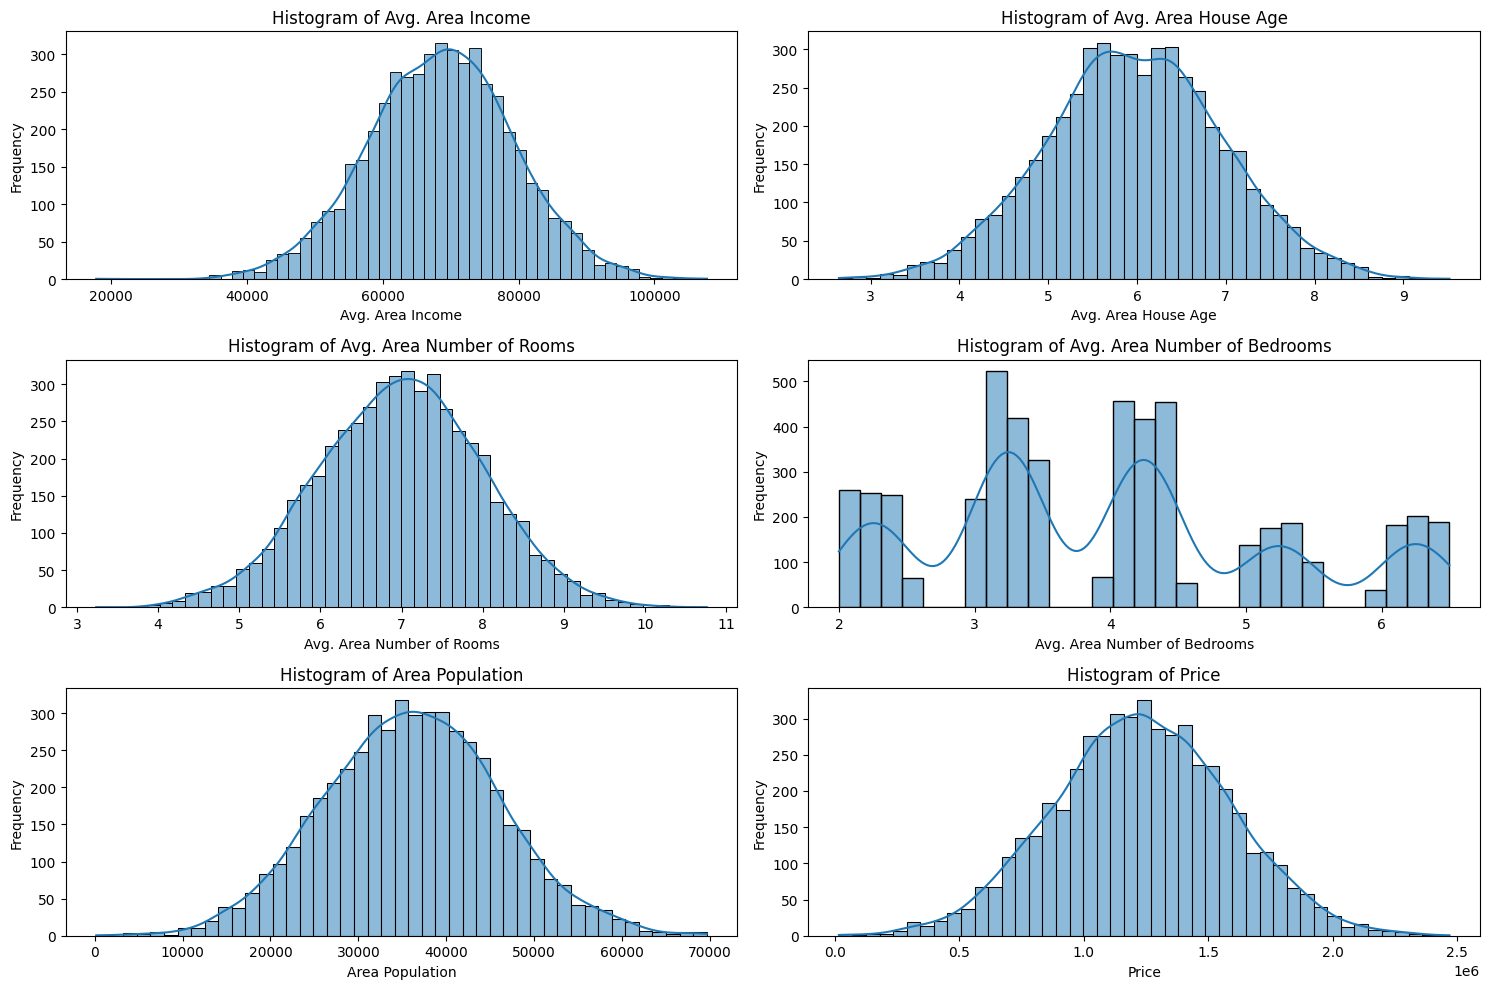

In [ ]:
# Plotting Histograms
# Define the columns of interest
columns_of_interest = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']

# Set the figure size for the plots
plt.figure(figsize=(15, 10))  # Adjust the size to fit all histograms

# Plot histograms for each of the columns of interest
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(3, 2, i)  # Adjust grid to 3x2 for 6 plots
    sns.histplot(cleaned_df[column], kde=True)  # Using seaborn's histplot with KDE (Kernel Density Estimate)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust the layout
plt.tight_layout()
plt.show()

### Handling Outliers

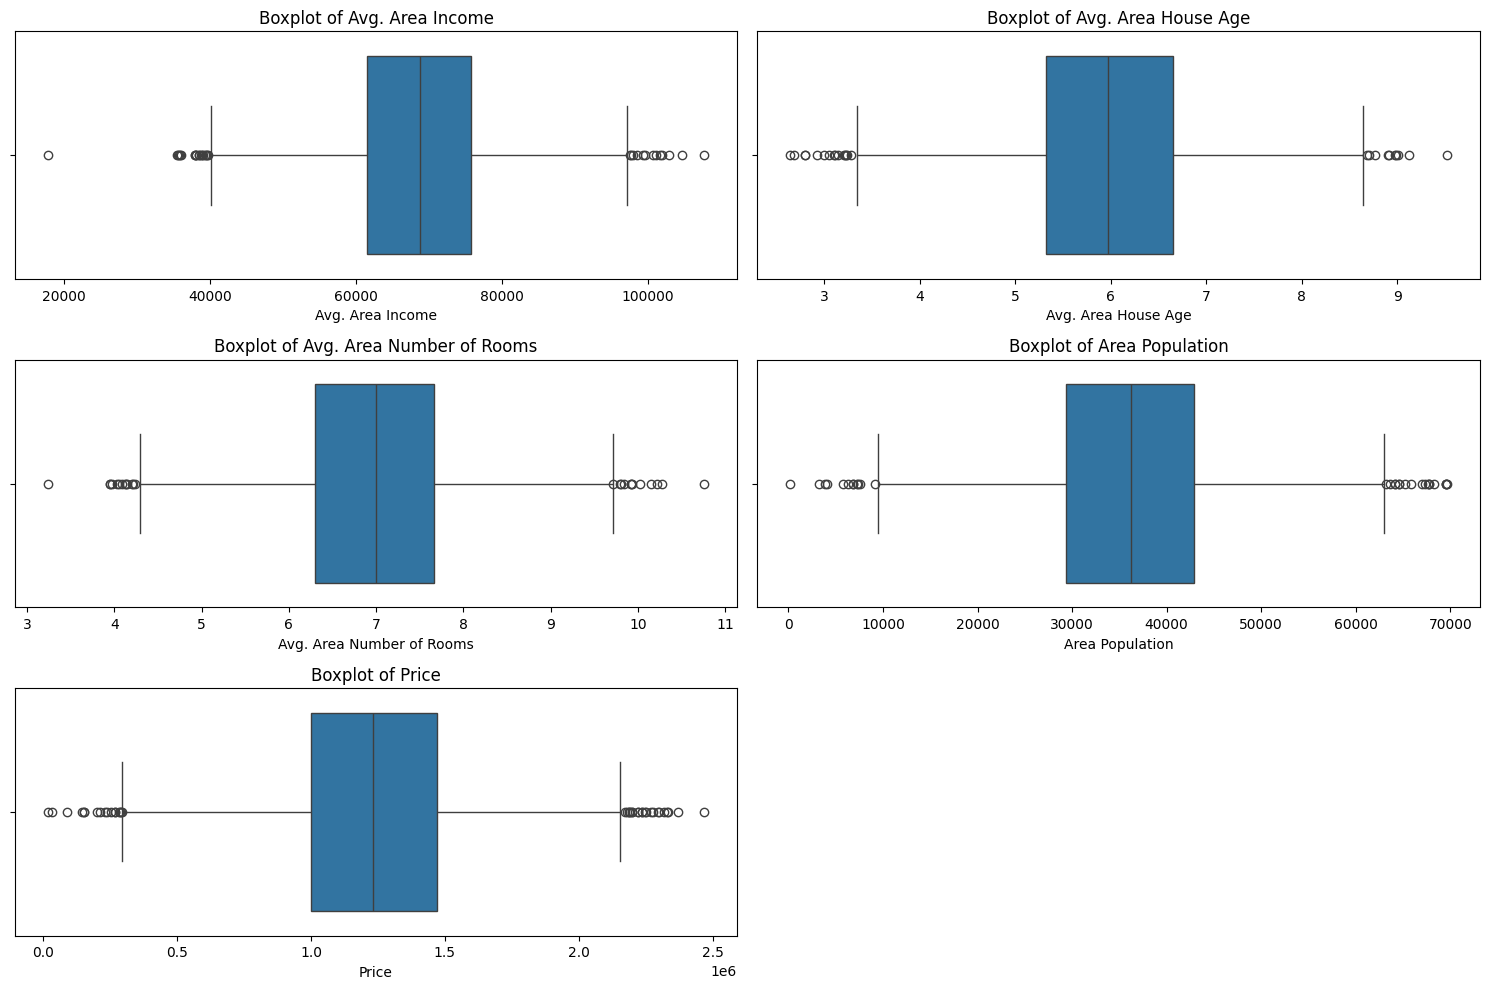

In [ ]:
# List of the columns for which you want to create box plots
columns_of_interest = [
    'Avg. Area Income',
    'Avg. Area House Age',
    'Avg. Area Number of Rooms',
    'Area Population',
    'Price'
]

# Set the figure size for the plots
plt.figure(figsize=(15, 10))  # Increase figure size to accommodate more plots

# Create box plots for each of the columns
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(3, 2, i)  # Adjust grid to 3x2 for 6 plots
    sns.boxplot(data=cleaned_df, x=column)
    plt.title(f'Boxplot of {column}')

# Adjust the layout
plt.tight_layout()
plt.show()

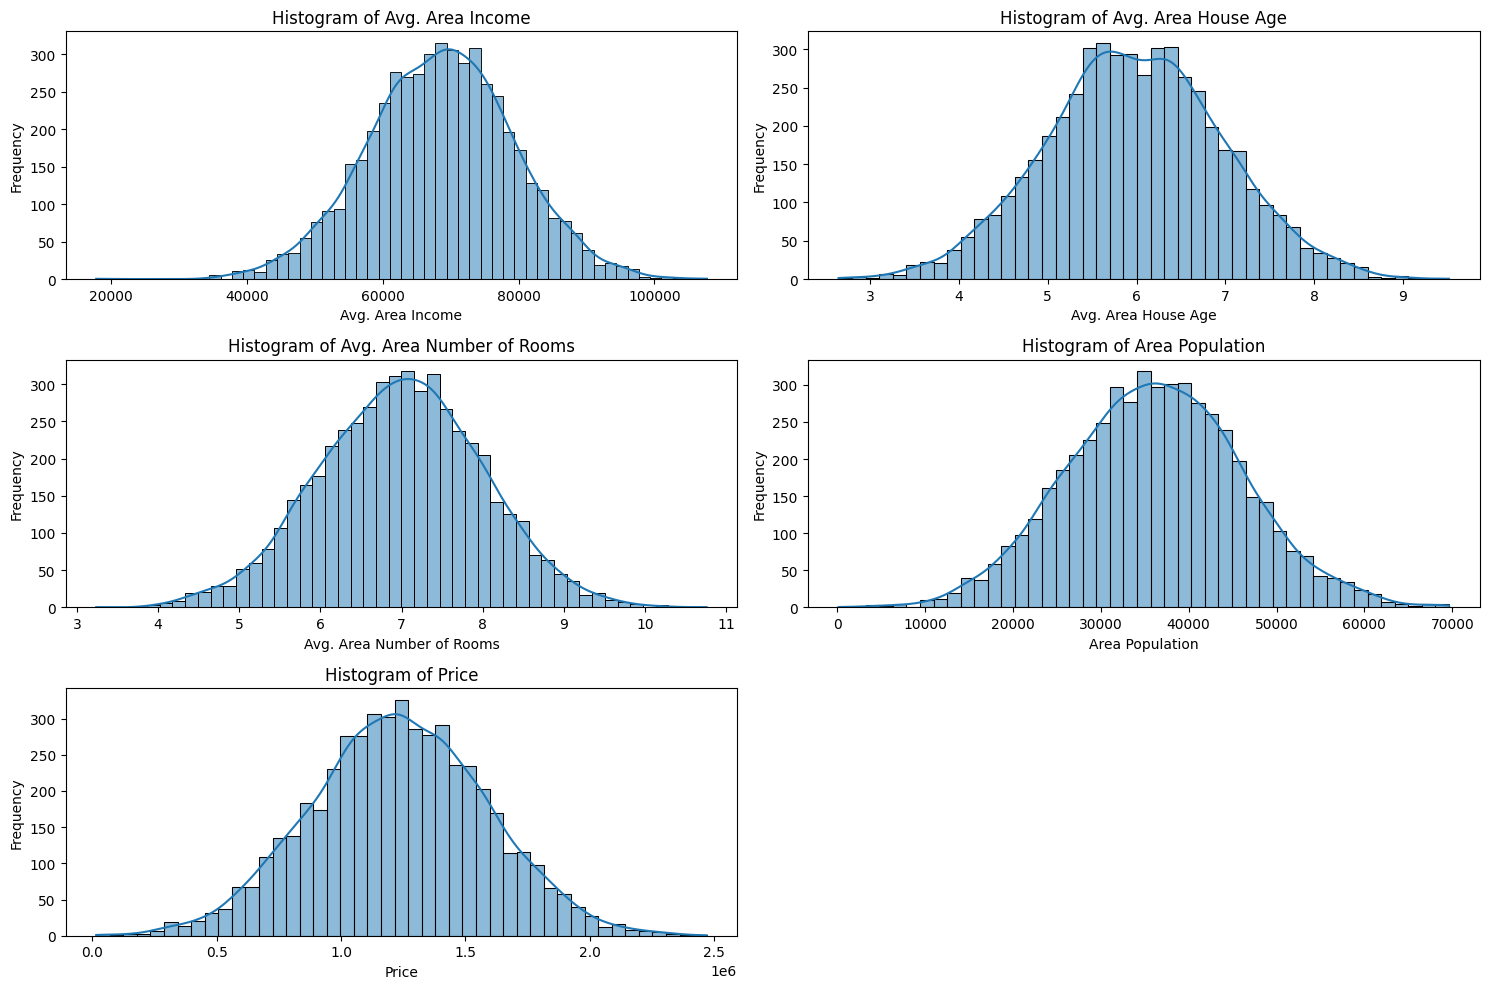

Skewness:
Avg. Area Income            -0.034092
Avg. Area House Age         -0.007108
Avg. Area Number of Rooms   -0.040698
Area Population              0.048934
Price                       -0.002172
dtype: float64
Kurtosis:
Avg. Area Income             0.045656
Avg. Area House Age         -0.082488
Avg. Area Number of Rooms   -0.071741
Area Population             -0.007413
Price                       -0.041510
dtype: float64


In [ ]:
# Checking the skewness and kurtosis for each column
# Define the columns of interest
columns_of_interest = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population', 'Price']

# Set the figure size for the plots
plt.figure(figsize=(15, 10))  # Adjust the size to fit all histograms

# Plot histograms for each of the columns of interest
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(3, 2, i)  # Adjust grid to 3x2 for 6 plots
    sns.histplot(cleaned_df[column], kde=True)  # Using seaborn's histplot with KDE (Kernel Density Estimate)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust the layout
plt.tight_layout()
plt.show()

# Calculate the skewness for each column in the columns_of_interest list
skewness = cleaned_df[columns_of_interest].skew()

# Output the skewness for each column
print("Skewness:")
print(skewness)

# Calculate the kurtosis for each column in the columns_of_interest list
kurtosis = cleaned_df[columns_of_interest].kurt()

# Output the kurtosis for each column
print("Kurtosis:")
print(kurtosis)

In [ ]:
# The z-score method will be utilized to handle the outliers as the distribution of the data is relatively normal
from scipy.stats import zscore

# List of the columns for which you want to remove outliers
columns_of_interest = [
    'Avg. Area Income',
    'Avg. Area House Age',
    'Avg. Area Number of Rooms',
    'Area Population',
    'Price'
]

# Apply Z-score transformation to the specified columns
z_scores = cleaned_df[columns_of_interest].apply(zscore)

# Filter rows where the absolute Z-score is less than or equal to 3 for all columns
cleaned_df2 = cleaned_df[(z_scores.abs() <= 3).all(axis=1)]

# Display the shape of the DataFrame before and after removing outliers
print(f"Original DataFrame shape: {cleaned_df.shape}")
print(f"DataFrame shape after removing outliers: {cleaned_df2.shape}")


Original DataFrame shape: (4996, 7)
DataFrame shape after removing outliers: (4939, 7)


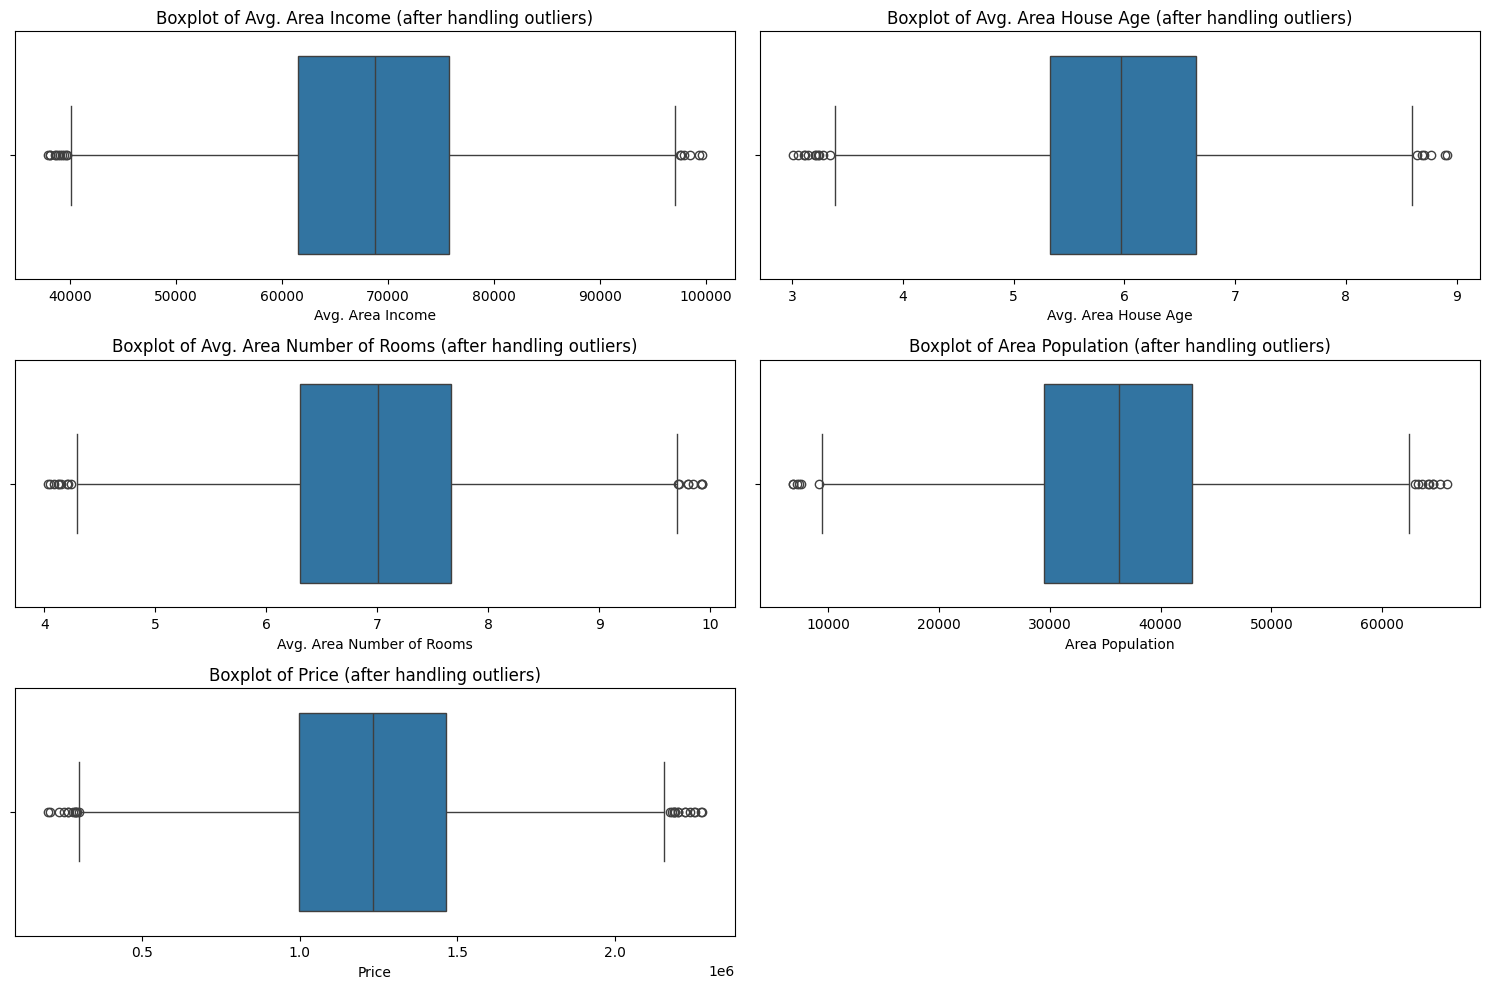

In [ ]:
# List of the columns for which you want to create box plots
columns_of_interest = [
    'Avg. Area Income',
    'Avg. Area House Age',
    'Avg. Area Number of Rooms',
    'Area Population',
    'Price'
]

# Set the figure size for the plots
plt.figure(figsize=(15, 10))  # Increase figure size to accommodate more plots

# Create box plots for each of the columns in the cleaned_df2 DataFrame (after handling outliers)
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(3, 2, i)  # Adjust grid to 3x2 for 6 plots
    sns.boxplot(data=cleaned_df2, x=column)  # Specify the cleaned_df2 DataFrame explicitly
    plt.title(f'Boxplot of {column} (after handling outliers)')

# Adjust the layout
plt.tight_layout()
plt.show()

### Plotting Histograms & Heatmap

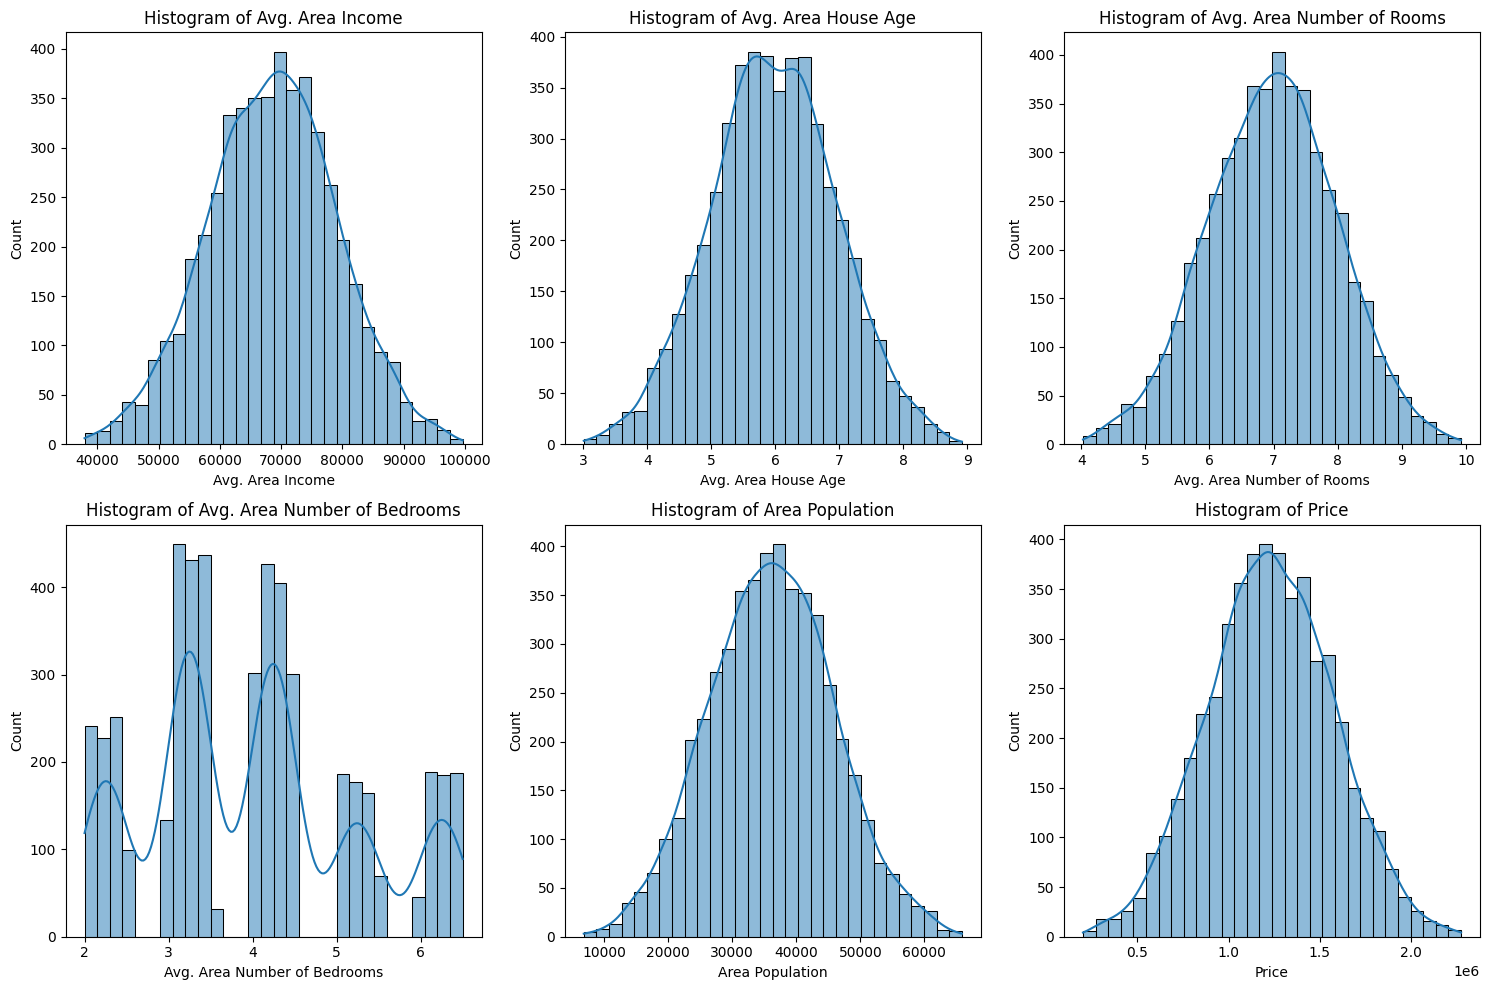

Skewness:
Avg. Area Income               -0.025404
Avg. Area House Age            -0.006005
Avg. Area Number of Rooms      -0.049700
Avg. Area Number of Bedrooms    0.372457
Area Population                 0.031045
Price                          -0.000050
dtype: float64
Kurtosis:
Avg. Area Income               -0.157614
Avg. Area House Age            -0.184063
Avg. Area Number of Rooms      -0.178935
Avg. Area Number of Bedrooms   -0.704838
Area Population                -0.182389
Price                          -0.180215
dtype: float64


In [ ]:
# List of columns to plot histograms for
columns_of_interest = [
    'Avg. Area Income',
    'Avg. Area House Age',
    'Avg. Area Number of Rooms',
    'Avg. Area Number of Bedrooms',
    'Area Population',
    'Price'
]

# Set the figure size for the plots
plt.figure(figsize=(15, 10))

# Create histograms for each of the columns in the cleaned_df2 DataFrame
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(2, 3, i)  # Adjust grid to 2x3 for 6 plots
    sns.histplot(cleaned_df2[column], kde=True, bins=30)  # Specify cleaned_df2 DataFrame
    plt.title(f'Histogram of {column}')

# Adjust the layout
plt.tight_layout()
plt.show()

# Calculate the skewness for each column in the columns_of_interest list
skewness = cleaned_df2[columns_of_interest].skew()

# Output the skewness for each column
print("Skewness:")
print(skewness)

# Calculate the kurtosis for each column in the columns_of_interest list
kurtosis = cleaned_df2[columns_of_interest].kurt()

# Output the kurtosis for each column
print("Kurtosis:")
print(kurtosis)

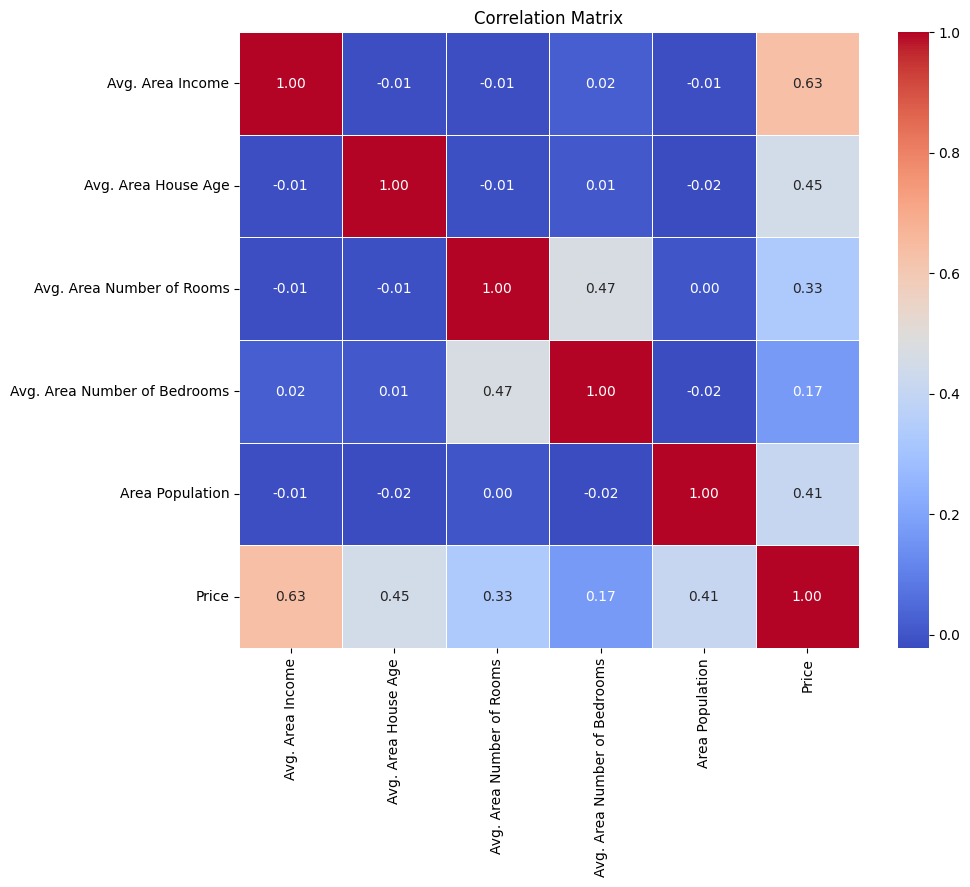

In [ ]:
# Select only numerical columns from the cleaned_df2 DataFrame
numerical_df = cleaned_df2.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Set the figure size for the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)

# Add a title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

### Feature Engineering

In [ ]:
# Create a new DataFrame with the processed data
processed_df = cleaned_df2.copy()

# Split the "Address" column into separate columns
address_parts = processed_df['Address'].str.split(', ', expand=True)

# Assign the parts to new columns
processed_df['Street Name'] = address_parts[0].str.replace(r'\d+', '', regex=True).str.strip()  # Remove numbers
processed_df['Postal Code'] = address_parts[1].str.split(' ', n=1).str[0]  # Extract Postal Code
processed_df['City'] = address_parts[1].str.split(' ', n=1).str[1]         # Extract City
processed_df['State'] = address_parts[2]
processed_df['Country'] = address_parts[3]

# Drop the original "Address" column if no longer needed
processed_df = processed_df.drop(columns=['Address', 'Country'])

# Display the first few rows of the new DataFrame
processed_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Street Name,Postal Code,City,State
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1059033.56,Jalan Sultan,50000,Shah Alam,Malacca
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1505890.92,Jalan Indah,75000,Ipoh,Penang
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1058987.99,Jalan Kasturi,30000,Petaling Jaya,Kuala Lumpur
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1260616.81,Jalan Ampang,10300,Kuala Lumpur,Malacca
4,59982.19723,5.040555,7.839388,4.23,26354.10947,630943.49,Jalan Indah,25000,Kuantan,Selangor


In [ ]:
processed_df.nunique()

,0
Avg. Area Income,4939
Avg. Area House Age,4939
Avg. Area Number of Rooms,4939
Avg. Area Number of Bedrooms,255
Area Population,4939
Price,4919
Street Name,8
Postal Code,8
City,8
State,7


In [ ]:
# Perform one-hot encoding
one_hot_cols = ['Street Name', 'Postal Code', 'City', 'State']
encoded_df = pd.get_dummies(processed_df, columns=one_hot_cols, drop_first=True)
encoded_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Street Name_Jalan Besar,Street Name_Jalan Bukit,Street Name_Jalan Indah,Street Name_Jalan Kasturi,...,City_Kuantan,City_Melaka,City_Petaling Jaya,City_Shah Alam,State_Kuala Lumpur,State_Malacca,State_Pahang,State_Penang,State_Perak,State_Selangor
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1059033.56,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1505890.92,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1058987.99,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1260616.81,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,59982.19723,5.040555,7.839388,4.23,26354.10947,630943.49,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True


In [ ]:
# Adding new columns to the DataFrame
encoded_df['Rooms-to-Bedrooms Ratio'] = encoded_df['Avg. Area Number of Rooms'] / encoded_df['Avg. Area Number of Bedrooms']
encoded_df['Population per Room'] = encoded_df['Area Population'] / encoded_df['Avg. Area Number of Rooms']

In [ ]:
# Displaying the first few rows to verify
encoded_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Street Name_Jalan Besar,Street Name_Jalan Bukit,Street Name_Jalan Indah,Street Name_Jalan Kasturi,...,City_Petaling Jaya,City_Shah Alam,State_Kuala Lumpur,State_Malacca,State_Pahang,State_Penang,State_Perak,State_Selangor,Rooms-to-Bedrooms Ratio,Population per Room
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1059033.56,False,False,False,False,...,False,True,False,True,False,False,False,False,1.713738,3293.790954
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1505890.92,False,False,True,False,...,False,False,False,False,False,True,False,False,2.178259,5968.524799
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1058987.99,False,False,False,True,...,True,False,True,False,False,False,False,False,1.659401,4332.590195
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1260616.81,False,False,False,False,...,False,False,False,True,False,False,False,False,1.713720,6141.383426
4,59982.19723,5.040555,7.839388,4.23,26354.10947,630943.49,False,False,True,False,...,False,False,False,False,False,False,False,True,1.853283,3361.756070


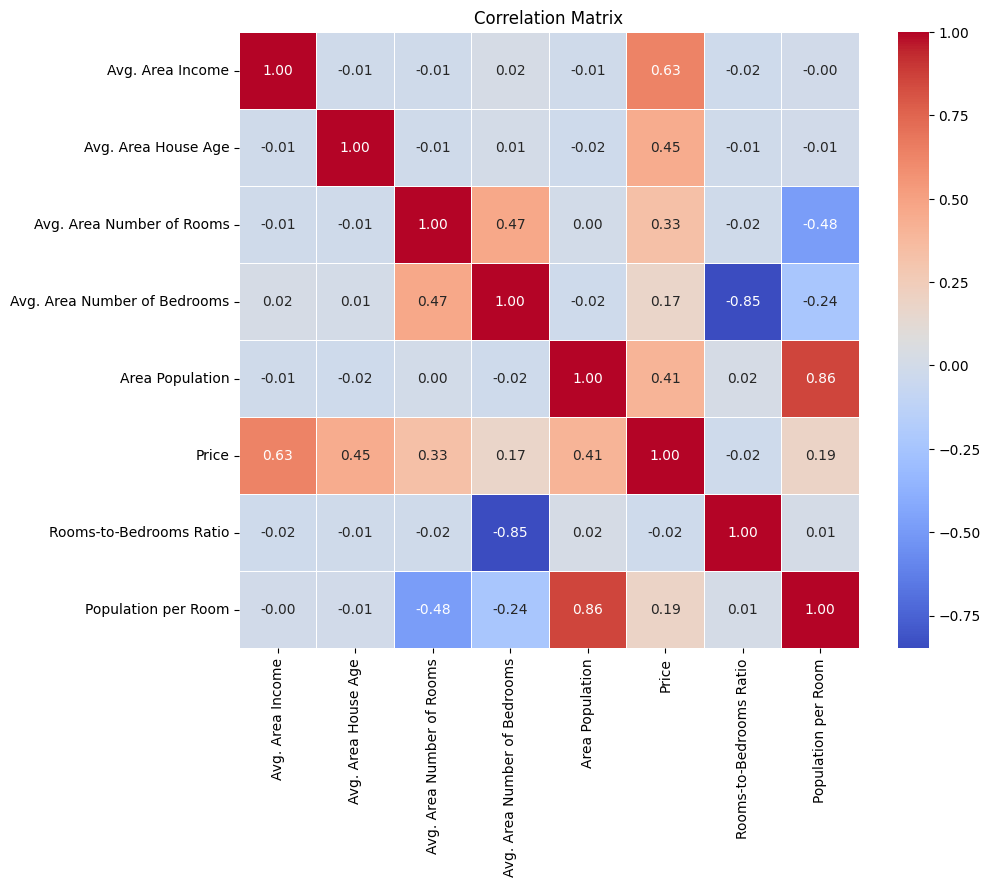

In [ ]:
# Select specific numerical columns
selected_features = [
    "Avg. Area Income",
    "Avg. Area House Age",
    "Avg. Area Number of Rooms",
    "Avg. Area Number of Bedrooms",
    "Area Population",
    "Price",
    "Rooms-to-Bedrooms Ratio",
    "Population per Room"
]

# Filter the DataFrame for these features
numerical_df = encoded_df[selected_features]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Set the figure size for the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)

# Add a title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

### Data Splitting (Training and Testing Sets)

In [ ]:
# Define the target variable 'y'
y = encoded_df['Price']

# Define the predictors 'X' (drop the target variable 'Price' from the DataFrame)
X = encoded_df.drop(columns=['Price'])

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Street Name_Jalan Besar,Street Name_Jalan Bukit,Street Name_Jalan Indah,Street Name_Jalan Kasturi,Street Name_Jalan Putra,...,City_Petaling Jaya,City_Shah Alam,State_Kuala Lumpur,State_Malacca,State_Pahang,State_Penang,State_Perak,State_Selangor,Rooms-to-Bedrooms Ratio,Population per Room
0,0.674604,0.453049,0.505451,0.464444,0.275706,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.300509,0.201513
1,0.669795,0.507189,0.458256,0.242222,0.565048,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.485602,0.416834
2,0.378779,0.484011,0.760365,0.695556,0.509319,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.278858,0.285138
3,0.412126,0.707706,0.264283,0.280000,0.465766,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.300502,0.430750
4,0.357638,0.344393,0.646205,0.495556,0.331035,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.356112,0.206984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4934,0.367128,0.816332,0.357638,0.324444,0.271482,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.324443,0.235907
4935,0.657524,0.675717,0.432136,0.448889,0.318538,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.269538,0.249907
4936,0.412862,0.718255,0.131760,0.028889,0.448085,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.516541,0.493681
4937,0.487565,0.427933,0.525958,0.764444,0.606580,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.139911,0.417615


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42  # 25% for testing, 75% for training
)
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Street Name_Jalan Besar,Street Name_Jalan Bukit,Street Name_Jalan Indah,Street Name_Jalan Kasturi,Street Name_Jalan Putra,...,City_Petaling Jaya,City_Shah Alam,State_Kuala Lumpur,State_Malacca,State_Pahang,State_Penang,State_Perak,State_Selangor,Rooms-to-Bedrooms Ratio,Population per Room
4093,0.439175,0.402498,0.425735,0.491111,0.281292,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.236545,0.224639
2585,0.702046,0.487908,0.632694,0.453333,0.348490,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.382982,0.220457
4189,0.631552,0.308978,0.301322,0.548889,0.578614,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.135134,0.504554
3838,0.699919,0.597621,0.739730,0.955556,0.577984,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.148366,0.329099
330,0.524490,0.291656,0.166992,0.533333,0.556406,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.071616,0.573301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.689824,0.254621,0.295596,0.066667,0.360211,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.617513,0.327984
466,0.401433,0.516450,0.464242,0.037778,0.596306,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.860062,0.436289
3092,0.618028,0.675822,0.240979,0.331111,0.657564,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.239808,0.610540
3772,0.499712,0.334002,0.568365,0.911111,0.316656,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.099743,0.214557


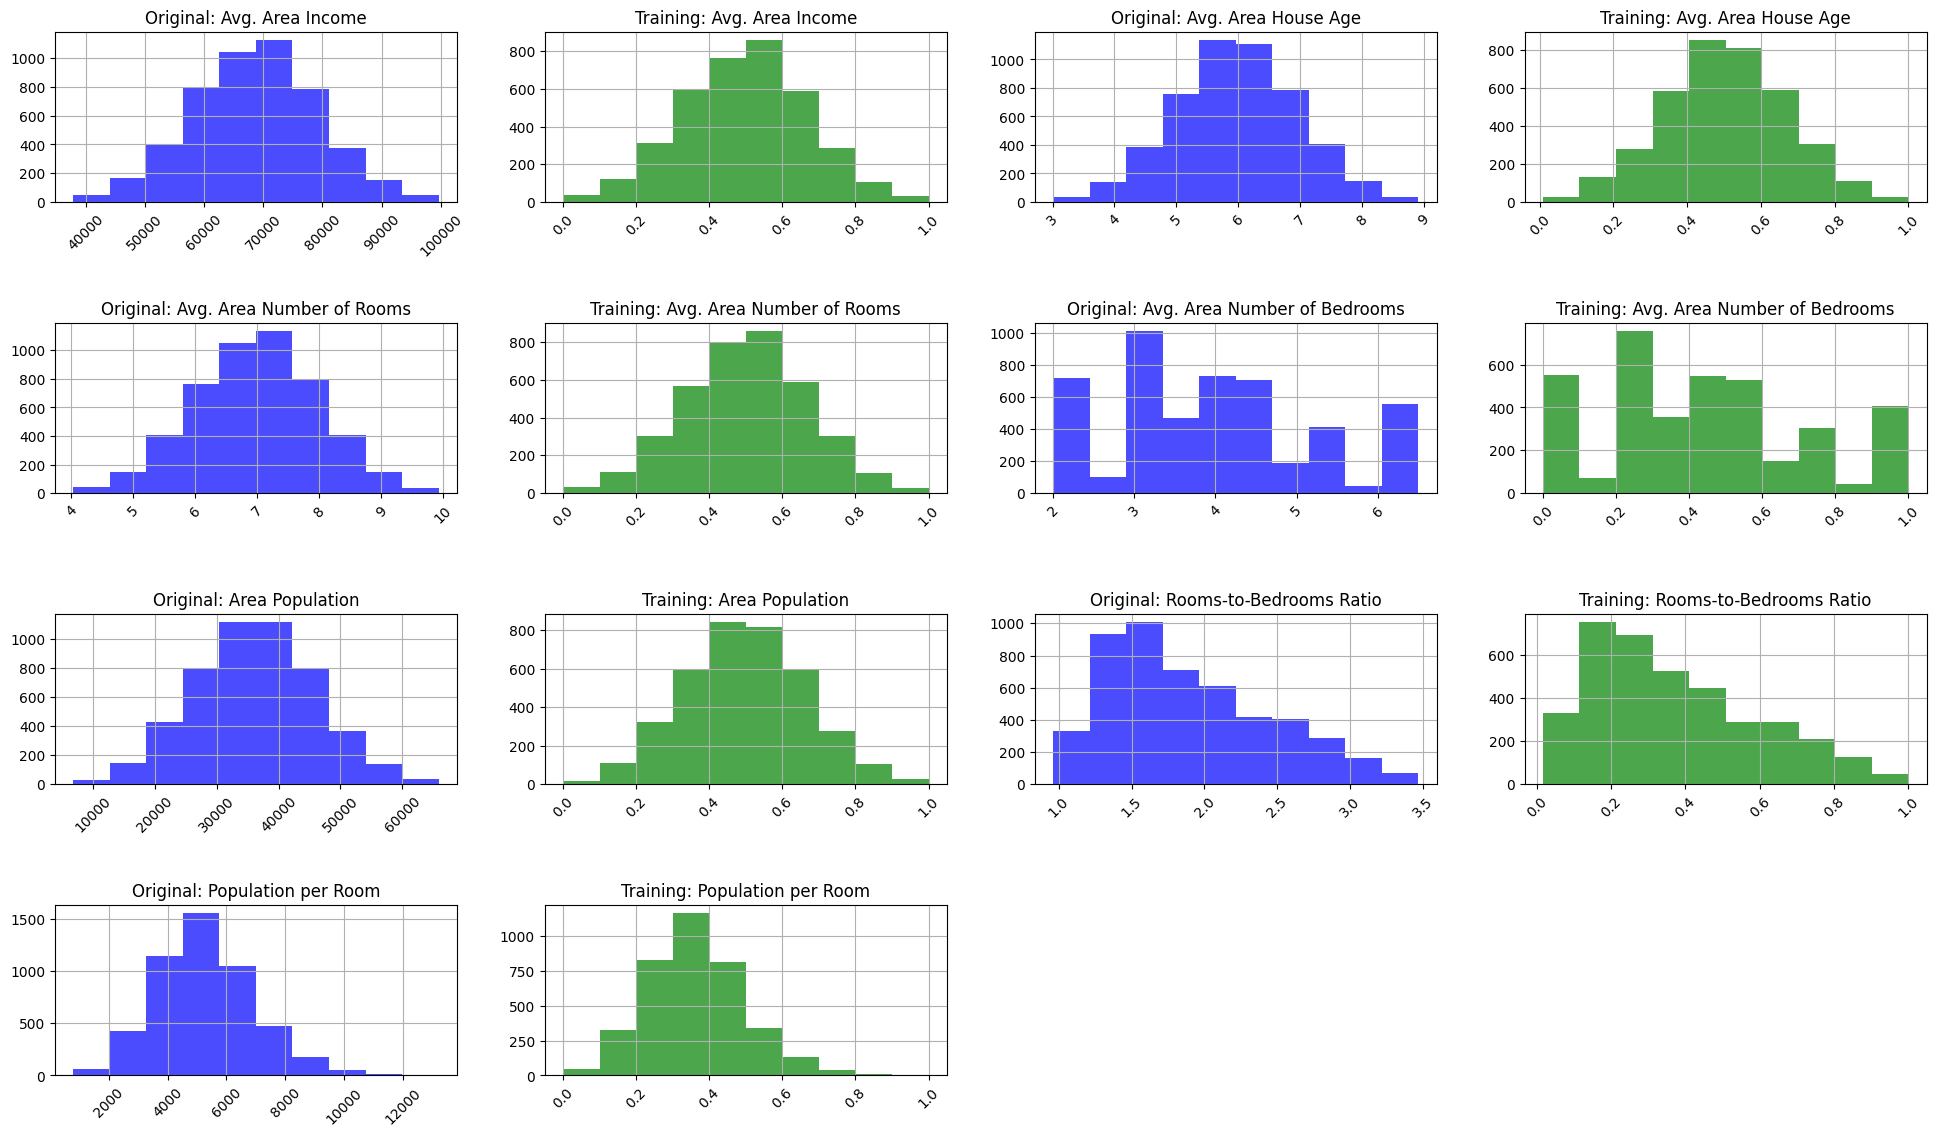

In [ ]:
# Check if all numerical columns from training are approximately the same as the original
# List of columns to compare
columns_to_compare = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
                      'Avg. Area Number of Bedrooms', 'Area Population', 'Rooms-to-Bedrooms Ratio',
                      'Population per Room']

# Set up the grid dynamically to have 4 pairs (8 plots) per row
pairs_per_row = 4
rows = (len(columns_to_compare) + pairs_per_row - 1) // pairs_per_row  # Calculate rows needed
fig, axes = plt.subplots(rows * 2, pairs_per_row, figsize=(20, rows * 6))  # Dynamic figure size
axes = axes.flatten()  # Flatten axes for easy indexing

# Loop through the columns and create histograms for original and train datasets
for i, column in enumerate(columns_to_compare):
    # Original dataset (Top row of the pair)
    encoded_df[column].hist(ax=axes[i * 2], color='blue', alpha=0.7)
    axes[i * 2].set_title(f'Original: {column}', fontsize=12)
    axes[i * 2].tick_params(axis='x', rotation=45)

    # Training dataset (Bottom row of the pair)
    X_train[column].hist(ax=axes[i * 2 + 1], color='green', alpha=0.7)
    axes[i * 2 + 1].set_title(f'Training: {column}', fontsize=12)
    axes[i * 2 + 1].tick_params(axis='x', rotation=45)

# Remove unused subplots if the number of columns doesn't fit perfectly
for j in range(len(columns_to_compare) * 2, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout(pad=3)
plt.show()

### VIF

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_df = pd.DataFrame(X_train, columns=['Avg. Area Income', 'Avg. Area House Age',
                                            'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms',
                                            'Area Population', 'Rooms-to-Bedrooms Ratio',
                                            'Population per Room'])  # Replace 'list_of_column_names' with your predictor names.

vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]

print(vif_data)

                       Variable         VIF
0              Avg. Area Income    9.138009
1           Avg. Area House Age    9.724431
2     Avg. Area Number of Rooms   89.309965
3  Avg. Area Number of Bedrooms   35.234665
4               Area Population  149.901034
5       Rooms-to-Bedrooms Ratio   28.418581
6           Population per Room  136.589597


In [ ]:
# Removing the specified columns
X_train = X_train.drop(columns=['Avg. Area Number of Bedrooms', 'Area Population'])

# Removing the same columns from X_test
X_test = X_test.drop(columns=['Avg. Area Number of Bedrooms', 'Area Population'])

In [ ]:
# Recompute the VIFs for the reduced dataset
X_train_df = pd.DataFrame(X_train, columns=['Avg. Area Income', 'Avg. Area House Age',
                                            'Avg. Area Number of Rooms', 'Rooms-to-Bedrooms Ratio',
                                            'Population per Room'])
vif_data_reduced = pd.DataFrame()
vif_data_reduced["Variable"] = X_train_df.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]

# Display VIFs
print(vif_data_reduced)

                    Variable       VIF
0           Avg. Area Income  7.904065
1        Avg. Area House Age  8.327957
2  Avg. Area Number of Rooms  6.987481
3    Rooms-to-Bedrooms Ratio  3.671115
4        Population per Room  6.247445


## Base Model Selection

In [ ]:
 # Comparing 6 ML's - Linear Regression, Decision Tree, Random Forest, K-Nearest Neighbours, XGBoost, SVM

import time
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Custom function for Adjusted R²
def adjusted_r2_score(y_true, y_pred, X):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    p = X.shape[1]
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Set a random seed for reproducibility
seed = 42
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

# Initialize models with initial hyperparameters for KNN and XGBoost
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=seed),
    'Random Forest': RandomForestRegressor(random_state=seed, n_estimators=100),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),  # Initial n_neighbors set to 5
    'XGBoost': XGBRegressor(random_state=seed, n_estimators=100),  # Initial n_estimators set to 100
    'Support Vector Machine': SVR()
}

# Initialize a list to hold results
cv_results = []
test_results = []

# Loop through models for cross-validation and test evaluation
for model_name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    mae_scores = -cv_scores
    mse_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    mse_scores = -mse_scores
    rmse_scores = np.sqrt(mse_scores)
    r2_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')

    # Adjusted R² for each fold
    adjusted_r2_scores = []
    for train_idx, val_idx in kfold.split(X_train):
        model.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
        y_pred = model.predict(X_train.iloc[train_idx])
        adjusted_r2_scores.append(adjusted_r2_score(y_train.iloc[train_idx], y_pred, X_train))

    # MAPE calculation
    mape_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring=make_scorer(mean_absolute_percentage_error))

    cv_results.append({
        'Model': model_name,
        'MAE': mae_scores.mean(),
        'MSE': mse_scores.mean(),
        'RMSE': rmse_scores.mean(),
        'R²': r2_scores.mean(),
        'Adjusted R²': np.mean(adjusted_r2_scores),
        'MAPE': mape_scores.mean()
    })

    # Test evaluation
    start_time = time.time()
    model.fit(X_train, y_train)
    fitting_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time

    final_mae = mean_absolute_error(y_test, y_pred)
    final_mse = mean_squared_error(y_test, y_pred)
    final_rmse = np.sqrt(final_mse)
    final_r2 = r2_score(y_test, y_pred)
    final_adjusted_r2 = adjusted_r2_score(y_test, y_pred, X_test)
    final_mape = mean_absolute_percentage_error(y_test, y_pred)

    relative_mae = (final_mae / np.mean(y_test)) * 100

    test_results.append({
        'Model': model_name,
        'Final MAE': final_mae,
        'Relative MAE (%)': relative_mae,
        'Final MSE': final_mse,
        'Final RMSE': final_rmse,
        'Final R²': final_r2,
        'Final MAPE': final_mape,
        'Final Median AE': np.median(np.abs(y_test - y_pred)),
        'Time for Fitting (s)': fitting_time,
        'Time for Prediction (s)': prediction_time
    })

# Convert results to DataFrame
cv_results_df = pd.DataFrame(cv_results)
test_results_df = pd.DataFrame(test_results)

# Display the results
print("Cross-Validation Results:")
print(cv_results_df)
print("\nFinal Test Results:")
print(test_results_df)

Cross-Validation Results:
                    Model            MAE           MSE           RMSE  \
0       Linear Regression   85956.030080  1.166461e+10  107943.151499   
1           Decision Tree  152930.899516  3.749938e+10  193522.833170   
2           Random Forest  100757.804328  1.615994e+10  127098.149207   
3     K-Nearest Neighbors  264730.552521  1.109237e+11  332757.875710   
4                 XGBoost  101985.364270  1.644512e+10  128165.384942   
5  Support Vector Machine  276359.978234  1.190529e+11  344789.866620   

         R²  Adjusted R²      MAPE  
0  0.900813     0.902913  0.078856  
1  0.681784     1.000000  0.138819  
2  0.862852     0.980585  0.094604  
3  0.063484     0.379403  0.262285  
4  0.860456     0.988712  0.094072  
5 -0.004226    -0.009719  0.277967  

Final Test Results:
                    Model      Final MAE  Relative MAE (%)     Final MSE  \
0       Linear Regression   84024.789230          6.821603  1.099176e+10   
1           Decision Tree  150

## Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Regularization strength for Ridge
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Regularization strength for Lasso

# Initialize Ridge and Lasso
ridge_model = Ridge(random_state=seed)
lasso_model = Lasso(random_state=seed, max_iter=10000)

# Perform hyperparameter tuning using GridSearchCV
ridge_tuner = GridSearchCV(estimator=ridge_model, param_grid=ridge_params, cv=kfold, scoring='neg_mean_absolute_error', n_jobs=-1)
lasso_tuner = GridSearchCV(estimator=lasso_model, param_grid=lasso_params, cv=kfold, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit the models to the training data
ridge_tuner.fit(X_train, y_train)
lasso_tuner.fit(X_train, y_train)

# Extract the best estimators
best_ridge = ridge_tuner.best_estimator_
best_lasso = lasso_tuner.best_estimator_

# Add tuned Ridge and Lasso models to the model dictionary
models.update({
    'Ridge Regression': best_ridge,
    'Lasso Regression': best_lasso
})

# Display the best hyperparameters
print("Best Ridge alpha:", ridge_tuner.best_params_)
print("Best Lasso alpha:", lasso_tuner.best_params_)


Best Ridge alpha: {'alpha': 0.1}
Best Lasso alpha: {'alpha': 100}


In [ ]:
# Initialize models with tuned hyperparameters for Ridge and Lasso
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=0.01),
    'Lasso Regression': Lasso(alpha=100)
}

# Re-initialize results lists
cv_results = []
test_results = []

# Loop through models for cross-validation and test evaluation
for model_name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    mae_scores = -cv_scores
    mse_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    mse_scores = -mse_scores
    rmse_scores = np.sqrt(mse_scores)
    r2_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')

    # Adjusted R² for each fold
    adjusted_r2_scores = []
    for train_idx, val_idx in kfold.split(X_train):
        model.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
        y_pred = model.predict(X_train.iloc[train_idx])
        adjusted_r2_scores.append(adjusted_r2_score(y_train.iloc[train_idx], y_pred, X_train))

    # MAPE calculation
    mape_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring=make_scorer(mean_absolute_percentage_error))

    cv_results.append({
        'Model': model_name,
        'MAE': mae_scores.mean(),
        'MSE': mse_scores.mean(),
        'RMSE': rmse_scores.mean(),
        'R²': r2_scores.mean(),
        'Adjusted R²': np.mean(adjusted_r2_scores),
        'MAPE': mape_scores.mean()
    })

    # Test evaluation
    start_time = time.time()
    model.fit(X_train, y_train)
    fitting_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time

    final_mae = mean_absolute_error(y_test, y_pred)
    final_mse = mean_squared_error(y_test, y_pred)
    final_rmse = np.sqrt(final_mse)
    final_r2 = r2_score(y_test, y_pred)
    final_adjusted_r2 = adjusted_r2_score(y_test, y_pred, X_test)
    final_mape = mean_absolute_percentage_error(y_test, y_pred)

    relative_mae = (final_mae / np.mean(y_test)) * 100

    test_results.append({
        'Model': model_name,
        'Final MAE': final_mae,
        'Relative MAE (%)': relative_mae,
        'Final MSE': final_mse,
        'Final RMSE': final_rmse,
        'Final R²': final_r2,
        'Final MAPE': final_mape,
        'Final Median AE': np.median(np.abs(y_test - y_pred)),
        'Time for Fitting (s)': fitting_time,
        'Time for Prediction (s)': prediction_time
    })

# Convert results to DataFrame
cv_results_df = pd.DataFrame(cv_results)
test_results_df = pd.DataFrame(test_results)

# Display the results
print("Cross-Validation Results:")
print(cv_results_df)
print("\nFinal Test Results:")
print(test_results_df)


Cross-Validation Results:
               Model           MAE           MSE           RMSE        R²  \
0  Linear Regression  85956.030080  1.166461e+10  107943.151499  0.900813   
1   Ridge Regression  85955.735778  1.166460e+10  107943.097356  0.900813   
2   Lasso Regression  85798.956556  1.162464e+10  107757.983413  0.901168   

   Adjusted R²      MAPE  
0     0.902913  0.078856  
1     0.902913  0.078857  
2     0.902870  0.078736  

Final Test Results:
               Model     Final MAE  Relative MAE (%)     Final MSE  \
0  Linear Regression  84024.789230          6.821603  1.099176e+10   
1   Ridge Regression  84026.182649          6.821716  1.099195e+10   
2   Lasso Regression  83959.655318          6.816315  1.097348e+10   

      Final RMSE  Final R²  Final MAPE  Final Median AE  Time for Fitting (s)  \
0  104841.603225  0.908043    0.076298     71193.843863              0.013437   
1  104842.517931  0.908041    0.076300     71145.879757              0.004428   
2  104754.40

## Residuals

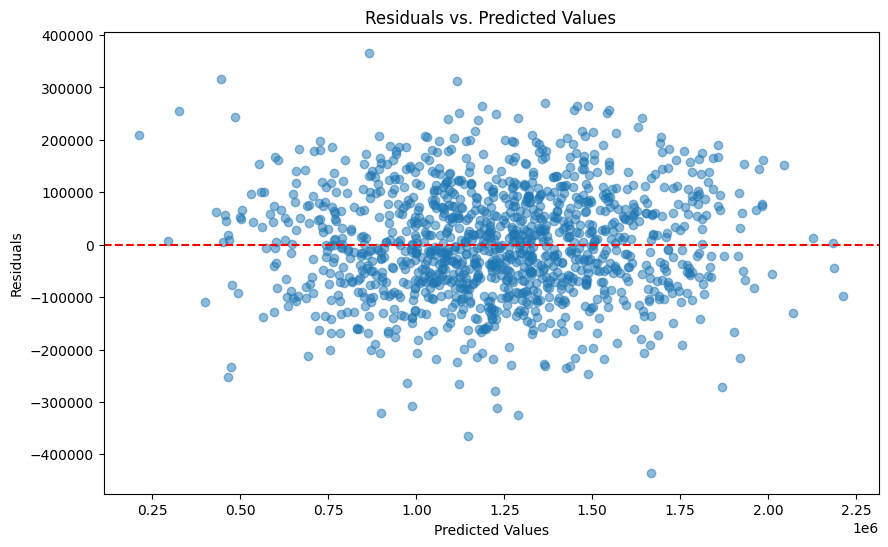

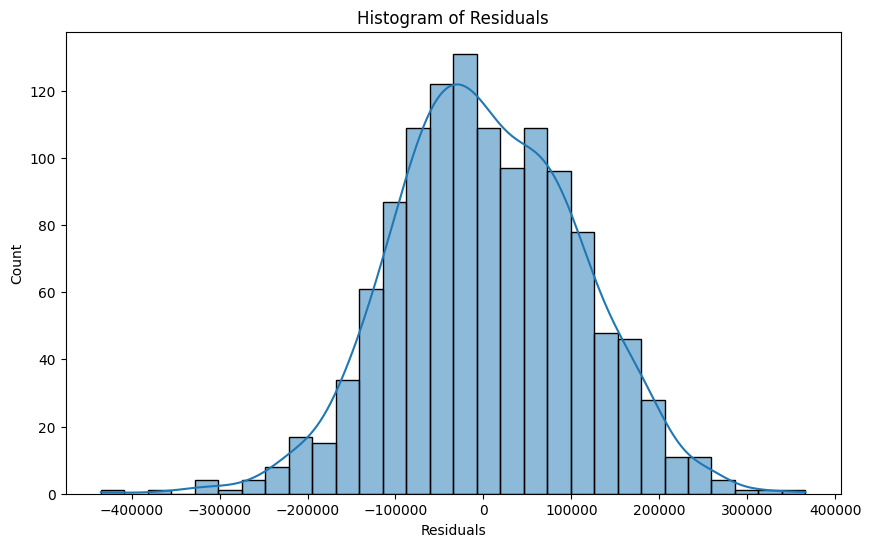

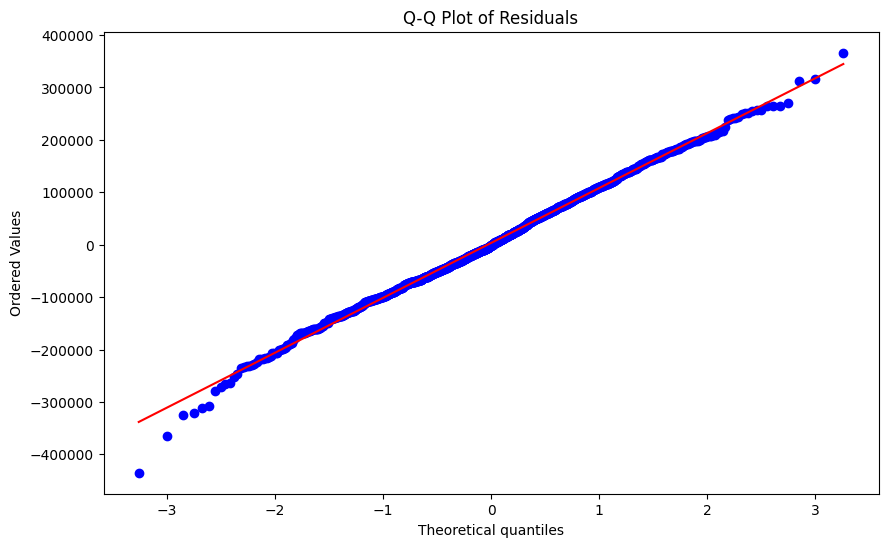

Shapiro-Wilk Test: p-value = 0.06585601829445109
Kolmogorov-Smirnov Test: p-value = 1.665000797106045e-291


In [ ]:
# Train the final model with the best parameters on the training set
best_model = Lasso(alpha=100)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
residuals = y_test - y_pred

# Residuals vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.show()

# Import stats module from scipy
from scipy import stats

# Q-Q Plot of Residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Optional: Statistical tests for normality
from scipy.stats import shapiro, kstest

# Shapiro-Wilk test for normality
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk Test: p-value = {shapiro_test.pvalue}")

# Kolmogorov-Smirnov test for normality
ks_test = kstest(residuals, 'norm')
print(f"Kolmogorov-Smirnov Test: p-value = {ks_test.pvalue}")

## Feature Importance

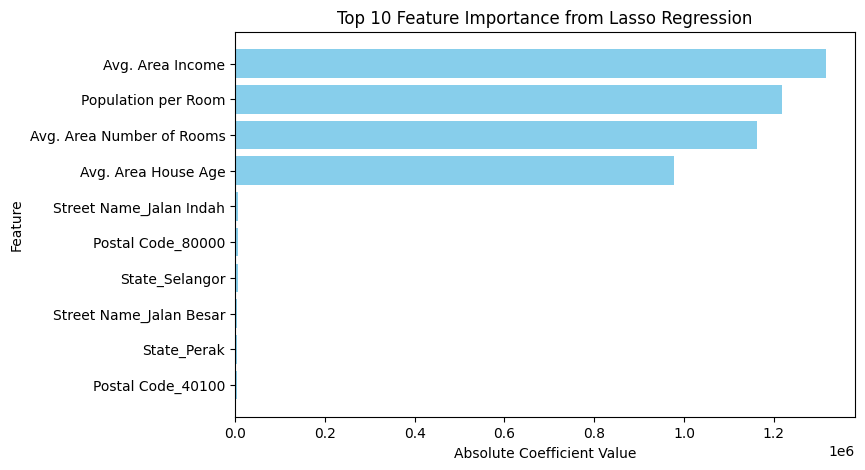

Top 10 Features:
                       Feature   Coefficient  Absolute Coefficient
0            Avg. Area Income  1.314925e+06          1.314925e+06
31        Population per Room  1.217127e+06          1.217127e+06
2   Avg. Area Number of Rooms  1.162943e+06          1.162943e+06
1         Avg. Area House Age  9.767884e+05          9.767884e+05
5     Street Name_Jalan Indah  7.236138e+03          7.236138e+03
16          Postal Code_80000  6.616906e+03          6.616906e+03
29             State_Selangor  6.597414e+03          6.597414e+03
3     Street Name_Jalan Besar  5.306703e+03          5.306703e+03
28                State_Perak -5.098411e+03          5.098411e+03
12          Postal Code_40100  4.330381e+03          4.330381e+03


In [ ]:
# Fit the Lasso model with the optimal alpha
lasso = Lasso(alpha=100, random_state=seed)  # Replace alpha with the optimal value
lasso.fit(X_train, y_train)

# Extract feature names and their coefficients
feature_names = X_train.columns
lasso_coefficients = lasso.coef_

# Create a DataFrame to store feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coefficients
})

# Sort features by absolute coefficient values
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Display the top 10 features
top_10_features = feature_importance.head(10)

# Plot the top 10 features
plt.figure(figsize=(8, 5))
plt.barh(top_10_features['Feature'], top_10_features['Absolute Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance from Lasso Regression')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

print("Top 10 Features:\n", top_10_features)